In [1]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean as cmo
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import sys
sys.path.append('../')

from geometry import Geometry
from forcing import Forcing
from layer import LayerModel

import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(precision=2)

np.seterr(all='ignore')
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2

In [2]:
years = np.arange(1956,1991)

In [3]:
#MITgcm

ds = xr.open_dataset('../../../data/paulholland/melt.nc')
ds = ds.sel(LONGITUDE=slice(360-114.7,360-109.3),LATITUDE=slice(-75.3,-74.1))#,TIME=timep)
melt = xr.where(ds.melt==0,np.nan,ds.melt)
melt = melt.mean(dim=['LONGITUDE','LATITUDE'],skipna=True)
MELT = np.zeros(len(years))
for y,yy in enumerate(years):
    MELT[y] = melt.sel(TIME=slice(f"{yy}-1-1",f"{yy}-12-31")).mean()

Text(0.5, 0, 'Year')

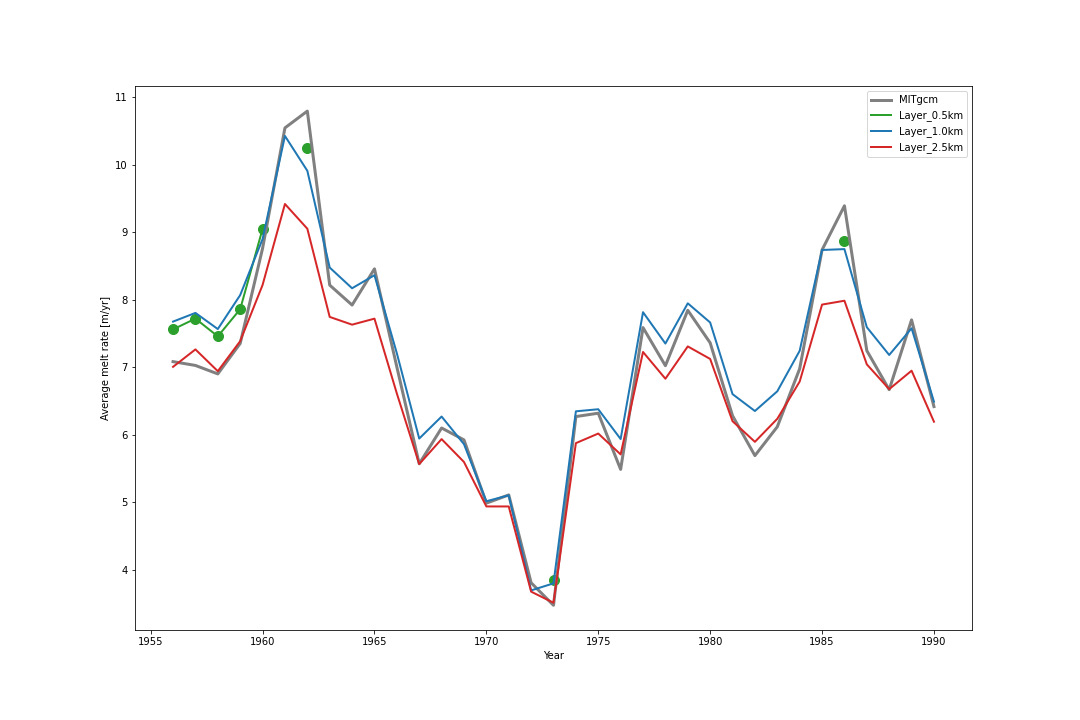

In [7]:
N = 3
fig = plt.figure(figsize=(15,10))

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Spectral_r(np.linspace(0,1,N)))

#plt.scatter(years,MELT,100,color='.5',label='MITgcm')
plt.plot(years,MELT,c='.5',label='MITgcm',lw=3)

tper = 10

cols = ['tab:green','tab:blue','tab:red']
MELT_n = {}

for r,res in enumerate(['0.5','1.0','2.5']):
    MELT_n[res] = np.nan*np.zeros(len(years))
    for y,yy in enumerate(years):
        try:
            ds = xr.open_dataset(f'../../results/CrossDots_{res}_mitgcm_{yy}_{yy}_{tper:.03f}.nc')
            MELT_n[res][y] = np.nanmean(np.where(ds.tmask==1,ds.melt,np.nan))
            ds.close()
        except:
            pass

    if res=='0.5':
        plt.scatter(years,MELT_n[res],100,c=cols[r])
    plt.plot(years,MELT_n[res],c=cols[r],label=f'Layer_{res}km',lw=2)
plt.legend()
plt.ylabel('Average melt rate [m/yr]')
plt.xlabel('Year')

In [8]:
print(np.nanmean(MELT_n['2.5']-MELT),np.nanmean(np.abs(MELT_n['2.5']-MELT)))
print(np.nanmean(MELT_n['1.0']-MELT),np.nanmean(np.abs(MELT_n['1.0']-MELT)))
print(np.nanmean(MELT_n['0.5']-MELT),np.nanmean(np.abs(MELT_n['0.5']-MELT)))

-0.31481716127262677 0.3663226715443235
0.19155545725113216 0.30854745208827805
0.22914422087009517 0.4955894523954479


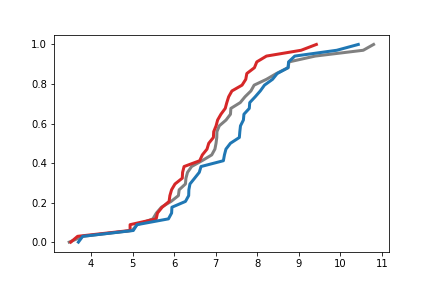

In [145]:
plt.plot(sorted(MELT),np.linspace(0,1,len(MELT)),lw=3,c='.5');
plt.plot(sorted(MELT_n['2.5']),np.linspace(0,1,len(MELT_n['2.5'])),lw=3,c='tab:red');
plt.plot(sorted(MELT_n['1.0']),np.linspace(0,1,len(MELT_n['1.0'])),lw=3,c='tab:blue');